# **Classificação Fumante: Modelos de Classificação e Mais Variáveis**

Como foi visto nos anteriores caso (**KNN**, **RLinear** ou **Árvore de Decisãao**) o fato de ser ou não fumante afeta muito o valor dos custos médicos quando falamos de seguro de saúde, portanto é possível de que a passoa omita o fato de ser fumante ou não. Esta omissão pode ser considerada como fraude e traz um grande perjuizo nas empresas que brindam estes planos.  

Em principio não teríamos a necesidade de prever a variável fumante (definida por Sim =1  e Não = 0). Assume-se que esta é uma variável cadastral, mas por se uma variável muito importante no cálculo dos custos médicos do plano de saúde é muito importante examinar a veracidade das informações dos dados cadastrais. Isto é, a idea não é predecir se a pessoa é fumante ou não, a ideia fundamental é verificar as informações fornecidas (ser fumante) para evitar perjuizo.

Com base nesta necessidade, a ideia neste problema é determinar se um novo elemento corresponde ou não a alguma das categorias (0, 1) de uma determinada variável (Fumante).

Para nosso caso ilustrativo vamos determinar (classificar) se elementos correspondem a uma determinada característica (variável fumante) usando como informação os dados de custos médicos. 

---


# Importação dos Dados:

Os dados podem ser obtido do site do Kaggle.com. Podemos fazer um download e depois abrir ou também importar diretamente usando um link onde esta o arquivo. Esses dados serão guardados na variável **dados** do tipo _dataframe_.

In [ ]:
# importação via github 
import pandas as pd
url = 'https://raw.githubusercontent.com/profjuanito/Dataset/main/insurance.csv'
dados = pd.read_csv(url)


# Informações dos dados e Mise en place:

Obter informações gerais dos dados como número de variáveis, tipo, etc. Os comandos podem ser visualizados e entendidos melhor nos anteriores scripts (Custos_Medicos.ipynb, etc)

Lembrar o que foi feito nos modelos anteriores:

* Transformar a variável **Fumante** em 0 (não) ou 1 (sim)
* Colocar a variável resposta na escala para cada mil dolares.

Nesta análise também vamos considerar só as variáveis:
* var. dependiente: **Fumante**
* var. independientes: índice de massa corporal (**IMC**), Idade(**age**) e o **custo**

In [ ]:
# mise un place
dados['smoker'] = dados['smoker'].map({'yes': 1, 'no': 0})
dados['charges'] = dados['charges']/1000 
dados['sex'] = dados['sex'].map({'male': 1, 'female': 0})

dados = dados[['age', 'bmi', 'sex', 'charges','smoker']]
dados.head()

,age,bmi,sex,charges,smoker
0,19,27.900,0,16.884924,1
1,18,33.770,1,1.725552,0
2,28,33.000,1,4.449462,0
3,33,22.705,1,21.984471,0
4,32,28.880,1,3.866855,0


In [ ]:
# separação de variáveis preditoras e variával resposta
X = dados[['age', 'bmi', 'charges']]
y = dados['smoker'] 

## Upgrade na Técnica de Validação: _K-FOLD_

Esta técnica de validação separamos os dados em K parte  

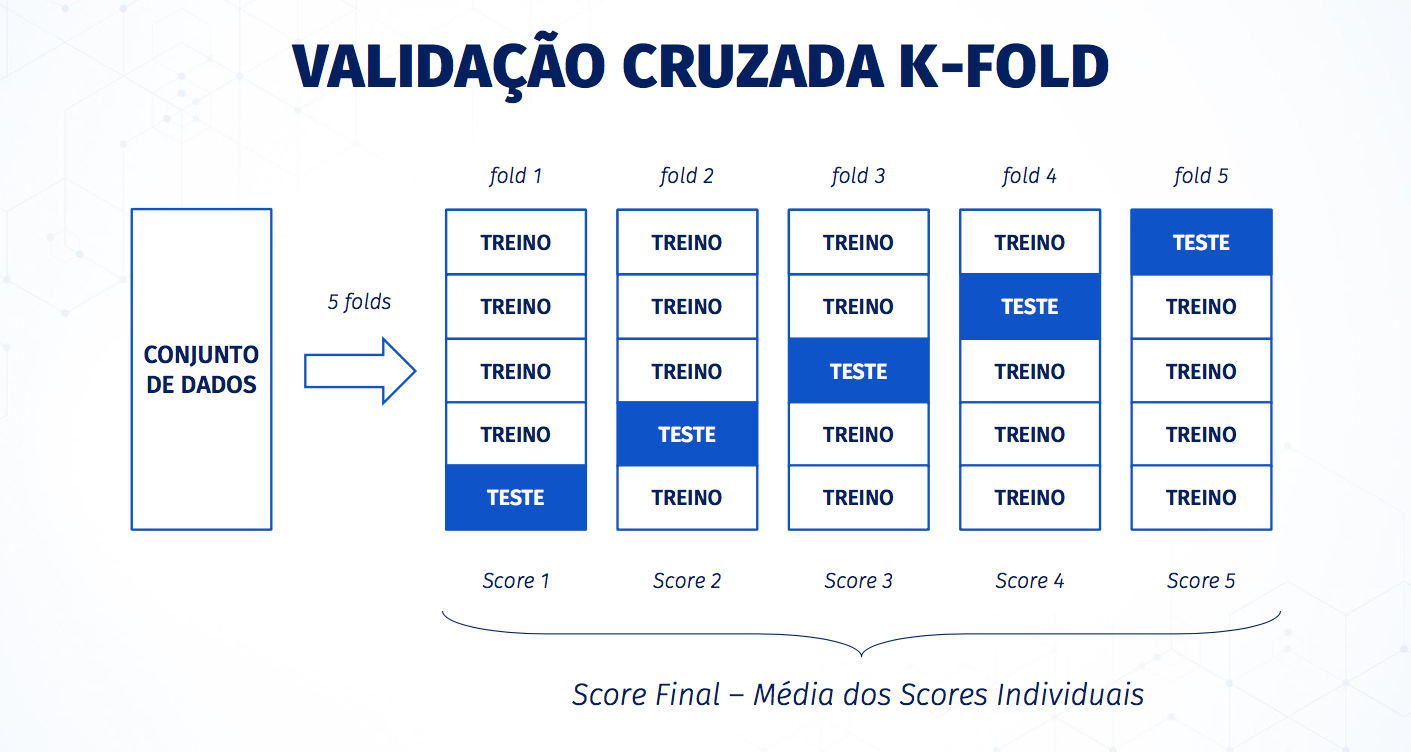



Neste método de validação todos os elementos do conjunto de dados vão para teste pelo menos uma vez. No gráfico acima temos um K=5 então o conjunto de dados é dividido em 5 parte e feito 5 vezes, e o score final é calculado da média destes grupos individuais.

Para a validação chamamos a biblioteca _sklearn.model_selection_ 

aplicando as funções:
   * _KFold_ ~> define os parametros de validação
   * _cross_validate_ -> a função que faz a validação cruzada e calcula a métrica.

_n_splits: definição das partes

_suffle_ : (embaralhar) indica que cada vez que rodar ela va a gerar uma novas distribuição.

In [ ]:
# Configuração da Validação Cruzada

from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

validacao = KFold(n_splits = 10, shuffle = True)

---
---

$Acur\acute{a}cia = \frac{VN + VP}{VN + VP +FN + FP}  \:\:\:\:\:\:\:\:\:\:\:\:  Sensibilidade = \frac{VP}{VN + VP} \:\:\:\:\:\:\:\:\:\:\:\:  Precis\tilde{a}o = \frac{VP}{VP + FP} $

---
---

## **Comparação de Modelos via Validação Cruzada K-FOLD**

Como será feita uma comparação entre os modelo: **Arvore de decisão** (com diferentes valores de profundidades), de **K-NN** (com diferentes valores de k) e de **Regressão Logística** é preferível criar uma função a qual será chamada por cada modelo.  

In [ ]:
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

modelos = [LogisticRegression(), 
           KNeighborsClassifier(n_neighbors = 5), 
           KNeighborsClassifier(n_neighbors = 15),
           KNeighborsClassifier(n_neighbors = 25),
           KNeighborsClassifier(n_neighbors = 35),
           KNeighborsClassifier(n_neighbors = 45),
           DecisionTreeClassifier(max_depth = 1),
           DecisionTreeClassifier(max_depth = 2),
           DecisionTreeClassifier(max_depth = 3),
           DecisionTreeClassifier(max_depth = 4),
           DecisionTreeClassifier(max_depth = 5)]

nomes = ['Regressão Logística',
         'KNN - K = 5', 
         'KNN - K = 15', 
         'KNN - K = 25', 
         'KNN - K = 35', 
         'KNN - K = 45',
         'Árvore - Prof = 1',
         'Árvore - Prof = 2',
         'Árvore - Prof = 3',
         'Árvore - Prof = 4',
         'Árvore - Prof = 5']

accs = []
sens = []
vpps = []

for modelo in modelos:
    resultados = cross_validate(modelo, X, y, cv = validacao, scoring = ['accuracy', 'recall', 'precision']) 
    accs.append(resultados['test_accuracy'].mean())
    sens.append(resultados['test_recall'].mean())
    vpps.append(resultados['test_precision'].mean())

aux = {'Acurácia': accs, 'Sensibilidade': sens, 'Precisão': vpps}
resultados = pd.DataFrame(aux, index = nomes)
resultados.sort_values(by = 'Acurácia', ascending = False).round(4)

,Acurácia,Sensibilidade,Precisão
KNN - K = 5,0.9731,0.9904,0.8928
Árvore - Prof = 5,0.9619,0.9409,0.8759
KNN - K = 15,0.9619,0.9879,0.8507
Árvore - Prof = 4,0.9604,0.9653,0.8561
Árvore - Prof = 3,0.9596,0.9514,0.8636
Regressão Logística,0.9559,0.9150,0.8796
KNN - K = 25,0.9537,0.9886,0.8152
KNN - K = 45,0.9514,0.9698,0.8187
KNN - K = 35,0.9514,0.9736,0.8222
Árvore - Prof = 1,0.9268,0.9612,0.7534


---

## Conclusão

Para esta análise, o fato de ter incluído a variável **Idade** trouxe  uma pequena melhora na acurácia. Para o modelo **K-NN** com valor de k= 5 obtivemos um melhor resultado de classificação, de cada cem elementos só erramos em 3. 

A realização dos teste de validação mostraram que a acurácia foi melhorada para alguns casos de cada modelo, o modelo de **K-NN** para k=5 resultou ligeramente melhor quando comparada aos modelos de  **Regressão Logística** ou **Árvore de Decisão**.  